Decision Tree -> MSE: 0.525 R²: 0.6
Random Forest -> MSE: 0.463 R²: 0.647


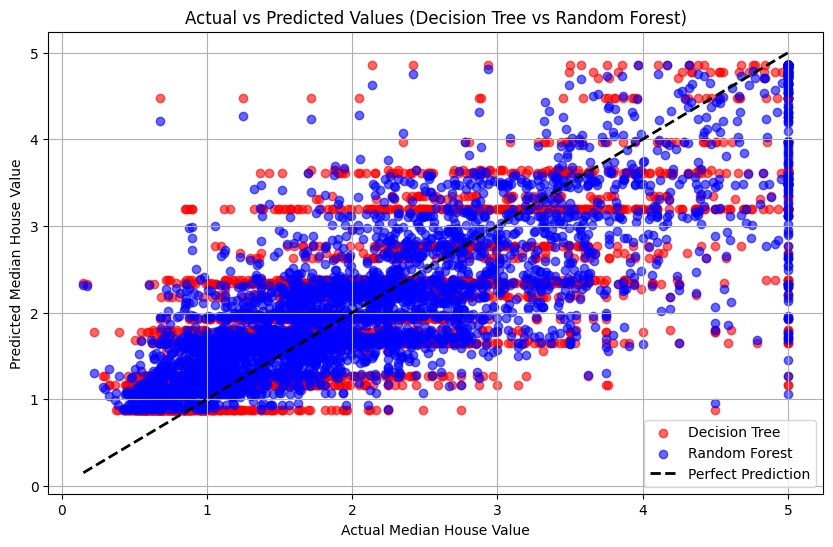

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

print("Decision Tree -> MSE:", round(mse_dt,3), "R²:", round(r2_dt,3))
print("Random Forest -> MSE:", round(mse_rf,3), "R²:", round(r2_rf,3))

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_dt, color='red', alpha=0.6, label='Decision Tree')
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values (Decision Tree vs Random Forest)')
plt.legend()
plt.grid(True)
plt.show()